In [1]:
import pandas as pd
import numpy as np
import itertools
import shap
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from Model_selection import Model_Selection
from Test_and_train_split import Test_And_Train_Split
from Evaluation_matrix import Evaluation_Matrix

In [2]:
df = pd.read_csv('Dataset/ABSTAT_dataset_final_exp.csv')
df = df.drop_duplicates(subset='Namespaces_or_individual_schema_IRI', keep="last")

In [3]:
df['Namespaces_or_individual_schema_IRI_entity'] = df['Namespaces_or_individual_schema_IRI'].str.split('//').str[-1]

In [4]:
df['Namespaces_or_individual_schema_IRI_entity'] = df['Namespaces_or_individual_schema_IRI_entity'].str.split('.').str[-1]

In [5]:
df['Namespaces_or_individual_schema_IRI_entity'] = df['Namespaces_or_individual_schema_IRI_entity'].str.split('/').str[-1]

In [6]:
df = df[df['Label'].notna()]

In [7]:
df

,Namespaces_or_individual_schema_IRI,Label,Namespaces_or_individual_schema_IRI_entity
1,http://purl.org/dc/terms/subject,2,subject
5,http://purl.org/dc/terms/publisher,1,publisher
8,http://purl.org/dc/terms/license,0,license
9,http://www.w3.org/2002/07/owl#ObjectProperty,0,owl#ObjectProperty
10,http://www.w3.org/2002/07/owl#DatatypeProperty,0,owl#DatatypeProperty
...,...,...,...
952,http://purl.org/dc/terms/title,2,title
953,http://www.w3.org/2004/02/skos/core#preflabel,2,core#preflabel
954,http://www.w3.org/2004/02/skos/core#scopenote,2,core#scopenote
955,http://www.w3.org/2004/02/skos/core#hiddenlabel,2,core#hiddenlabel


In [8]:
from Text_representation import TF_IDF_for_Random_forest

matrix_tfidf_pd, matrix_tfidf_features, vect_tfidf  = TF_IDF_for_Random_forest.tf_idf_for_random_forest(df,'Namespaces_or_individual_schema_IRI_entity')

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [9]:
matrix_tfidf_pd

,22,core,drugbank_vocabulary,language,lemon,lexinfo,nif,ns,oboinowl,ont,...,prov,rdf,schema,skos,syntax,tbx,terminology,translation,wgs84_pos,xmlschema
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
953,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
954,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
955,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print(matrix_tfidf_pd.shape)

(701, 23)


In [11]:
from imblearn.over_sampling import SMOTE

labels = df.Label
smote = SMOTE(random_state=777, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(matrix_tfidf_features, labels)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = Test_And_Train_Split.train_test_split(X_smote, y_smote, test_size=0.3, random_state=1)


In [12]:
#save the data as .npy files
np.save("Dataset/Train/X_train_tfidf.npy", X_train_tfidf)
np.save("Dataset/Test/X_test_tfidf.npy", X_test_tfidf)
np.save("Dataset/Train/y_train_tfidf.npy", y_train_tfidf)
np.save("Dataset/Test/y_test_tfidf.npy", y_test_tfidf)

In [13]:

def model_evaluation(X_train, X_test, y_train, y_test, target_names):
    
    
    #Random Forest Classifier
    
    model_RFC = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 15, min_samples_leaf= 1, min_samples_split= 100, n_estimators= 10)
    model_RFC.fit(X_train, y_train)
    y_pred_RFC = model_RFC.predict(X_test)
    
    # LinearSVC
    
    model_LSVC = LinearSVC()
    model_LSVC.fit(X_train, y_train)
    y_pred_LSVC = model_LSVC.predict(X_test)
    
    #Logistic Regression
    
    model_LR = LogisticRegression()
    model_LR.fit(X_train, y_train)
    y_pred_LR = model_LR.predict(X_test)
    

    #MultinomialNB
    
    model_MNB = MultinomialNB()
    model_MNB.fit(X_train, y_train)
    y_pred_MNB = model_MNB.predict(X_test)
    
    #KNeighbors Classifier
    
    model_KNC = KNeighborsClassifier(3)
    model_KNC.fit(X_train, y_train)
    y_pred_KNC = model_KNC.predict(X_test)
    
    #SVC(gamma=2, C=1)
    
    model_SVC_g = SVC(gamma=2, C=1)
    model_SVC_g.fit(X_train, y_train)
    y_pred_SVC_g = model_SVC_g.predict(X_test)
    
    
    #SVC(kernel="linear", C=0.025)
    
    model_SVC_l = SVC(kernel = "linear", C=0.025)
    model_SVC_l.fit(X_train, y_train)
    y_pred_SVC_l = model_SVC_l.predict(X_test)
    
    #Decision Tree Classifier
    
    model_DTC = DecisionTreeClassifier(max_depth=5)
    model_DTC.fit(X_train, y_train)
    y_pred_DTC = model_DTC.predict(X_test)
    
    #MLP Classifier
    
    model_MLPC = MLPClassifier(alpha=1, max_iter=1000)
    model_MLPC.fit(X_train, y_train)
    y_pred_MLPC = model_MLPC.predict(X_test)
    
    
    #AdaBoost Classifier
    
    model_ABC = AdaBoostClassifier()
    model_ABC.fit(X_train, y_train)
    y_pred_ABC = model_ABC.predict(X_test)

    
    
    
    print("Random Forest Classifier: \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_RFC, target_names = target_names)
    print("LinearSVC: \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_LSVC, target_names = target_names)
    print("Logistic Regression: \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_LR, target_names = target_names)
    print("MultinomialNB: \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_MNB, target_names = target_names)
    print("KNeighbors Classifier: \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_KNC, target_names = target_names)
    print("SVC(gamma=2, C=1): \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_SVC_g, target_names = target_names)
    print("SVC(kernel=linear, C=0.025): \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_SVC_l, target_names = target_names)
    print("Decision Tree Classifier: \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_DTC, target_names = target_names)
    print("MLP Classifier: \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_MLPC, target_names = target_names)
    print("AdaBoost Classifier: \n")
    Evaluation_Matrix.evaluation_matrix(y_test, y_pred_ABC, target_names = target_names)

In [14]:
target_names = ['0','1','2']

In [15]:
model_evaluation(X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf, target_names)

Random Forest Classifier: 

              precision    recall  f1-score   support

           0       0.65      0.30      0.41        87
           1       0.42      0.88      0.57        96
           2       0.64      0.25      0.36        93

    accuracy                           0.48       276
   macro avg       0.57      0.47      0.44       276
weighted avg       0.57      0.48      0.45       276

LinearSVC: 

              precision    recall  f1-score   support

           0       0.64      0.29      0.40        87
           1       0.42      0.86      0.56        96
           2       0.61      0.25      0.35        93

    accuracy                           0.47       276
   macro avg       0.55      0.47      0.44       276
weighted avg       0.55      0.47      0.44       276

Logistic Regression: 

              precision    recall  f1-score   support

           0       0.55      0.34      0.42        87
           1       0.43      0.82      0.56        96
           

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Check the work best ML.

In [16]:
model_SVC_g = SVC(gamma=2, C=1)
model_SVC_g.fit(X_train_tfidf, y_train_tfidf)
y_pred_SVC_g = model_SVC_g.predict(X_test_tfidf)

print("SVC Classifier: \n")
Evaluation_Matrix.evaluation_matrix(y_test_tfidf, y_pred_SVC_g, target_names = target_names)

SVC Classifier: 

              precision    recall  f1-score   support

           0       0.67      0.30      0.41        87
           1       0.44      0.84      0.58        96
           2       0.58      0.32      0.41        93

    accuracy                           0.50       276
   macro avg       0.56      0.49      0.47       276
weighted avg       0.56      0.50      0.47       276



In [17]:
import pickle

model_pickle_path_and_name = './model_pickles/SVC_tf_idf.pickle'
vec_pickle_path_and_name = './model_pickles/vect_tfidf.pickle'
pickle.dump(model_SVC_g, open(model_pickle_path_and_name, 'wb'))
pickle.dump(vect_tfidf, open(vec_pickle_path_and_name, "wb"))
print("====done saving into pickle using Pickle!====")

====done saving into pickle using Pickle!====


## SHAP

In [18]:
model_RFC = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 15, min_samples_leaf= 1, min_samples_split= 100, n_estimators= 10)
model_RFC.fit(X_train_tfidf, y_train_tfidf)
y_pred_RFC = model_RFC.predict(X_test_tfidf)

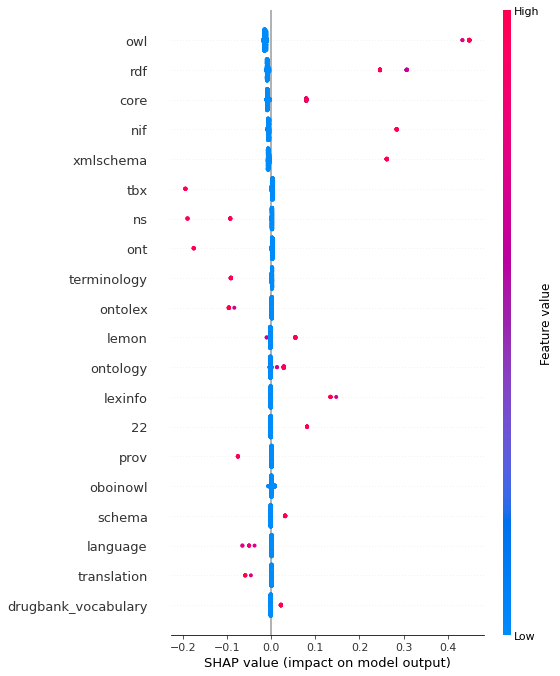

In [19]:
name = 'Namespaces_or_individual_schema_IRI_entity'
y = df['Label']
matrix_reduced=matrix_tfidf_pd 
X = matrix_reduced
X_train, X_test, Y_train, Y_test = Test_And_Train_Split.train_test_split(X, y, test_size = 0.3,random_state=1)  
model_RFC.fit(X_train, Y_train)  
shap_values = shap.TreeExplainer(model_RFC).shap_values(X)
f = plt.figure()

shap.summary_plot(shap_values[0], X)
f.savefig("SHAP/summary_importance_RF_Namespaces_or_individual_schema_IRI.pdf", bbox_inches='tight')  